In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load Iris dataset (Multi-class)
iris = load_iris()
X_iris, y_iris = iris.data, iris.target

# Split the Iris dataset
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.3, random_state=42)

# Load Breast Cancer dataset (Binary classification)
cancer = load_breast_cancer()
X_cancer, y_cancer = cancer.data, cancer.target

# Split the Breast Cancer dataset
X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = train_test_split(X_cancer, y_cancer, test_size=0.3, random_state=42)


In [3]:
# Initialize KNeighborsClassifier (choosing k=5 as default)
knn_iris = KNeighborsClassifier(n_neighbors=5)
knn_cancer = KNeighborsClassifier(n_neighbors=5)

# Train KNN for Iris dataset
knn_iris.fit(X_train_iris, y_train_iris)

# Train KNN for Breast Cancer dataset
knn_cancer.fit(X_train_cancer, y_train_cancer)


KNeighborsClassifier()

In [7]:
# Predict on Iris dataset
y_pred_iris = knn_iris.predict(X_test_iris)

# Predict on Breast Cancer dataset
y_pred_cancer = knn_cancer.predict(X_test_cancer)

# Accuracy for Iris
accuracy_iris = accuracy_score(y_test_iris, y_pred_iris)
print(f"Iris Dataset Accuracy: {accuracy_iris * 100:.2f}%")

# Accuracy for Cancer
accuracy_cancer = accuracy_score(y_test_cancer, y_pred_cancer)
print(f"Breast Cancer Dataset Accuracy: {accuracy_cancer * 100:.2f}%")


Iris Dataset Accuracy: 100.00%
Breast Cancer Dataset Accuracy: 95.91%


In [10]:
# Iris dataset
conf_matrix_iris = confusion_matrix(y_test_iris, y_pred_iris)
class_report_iris = classification_report(y_test_iris, y_pred_iris, target_names=iris.target_names)

# Breast Cancer dataset
conf_matrix_cancer = confusion_matrix(y_test_cancer, y_pred_cancer)
class_report_cancer = classification_report(y_test_cancer, y_pred_cancer, target_names=cancer.target_names)

# Print results for Iris
print("\nIris Classification Report:\n", class_report_iris)

# Print results for Breast Cancer
print("\nBreast Cancer Classification Report:\n", class_report_cancer)



Iris Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Breast Cancer Classification Report:
               precision    recall  f1-score   support

   malignant       0.98      0.90      0.94        63
      benign       0.95      0.99      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



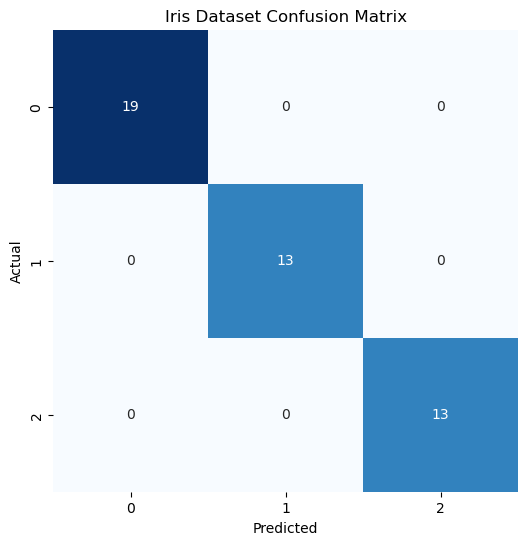

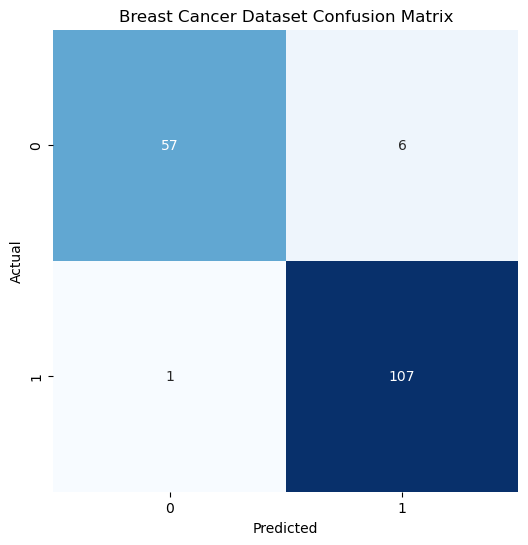

In [12]:
# Function to plot confusion matrices
def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(6,6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Plot for Iris dataset
plot_confusion_matrix(conf_matrix_iris, "Iris Dataset Confusion Matrix")

# Plot for Breast Cancer dataset
plot_confusion_matrix(conf_matrix_cancer, "Breast Cancer Dataset Confusion Matrix")
